<a href="https://colab.research.google.com/github/SampMark/Machine-Learn/blob/main/k_Means_applied_to_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Aplicação do algoritmo k-Means na segmentação de clientes**

---



Utilizando dados hipotéticos e históricos de clientes, a segmentação aqui implementada busca agrupá-los por características semelhantes, tendo-se em vista a otimização das estratégias de marketing da empresa.

Essa prática permite identificar e priorizar grupos específicos, como clientes de "alto valor" e baixo risco, propensos a adquirir produtos ou serviços, direcionando esforços para sua retenção.

A segmentação também possibilita a personalização de campanhas para outros grupos, como organizações sem fins lucrativos, maximizando o impacto das ações de marketing.

## **Importando as bibliotecas necessárias**

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Importando e explorando o DataSet**

---

In [2]:
cust_df = pd.read_csv("https://raw.githubusercontent.com/SampMark/files/refs/heads/main/Cust_Segmentation.csv")

num_rows = cust_df.shape[0]
num_cols = cust_df.shape[1]

# Definir a variável df
df = cust_df.drop('Address', axis=1)

# Lista todas as colunas do DataFrame 'df'
print(df.columns.tolist())
print(f"O DataFrame 'cust_df' possui {num_rows} linhas e {num_cols} colunas.")
cust_df.head()

['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']
O DataFrame 'cust_df' possui 850 linhas e 10 colunas.


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


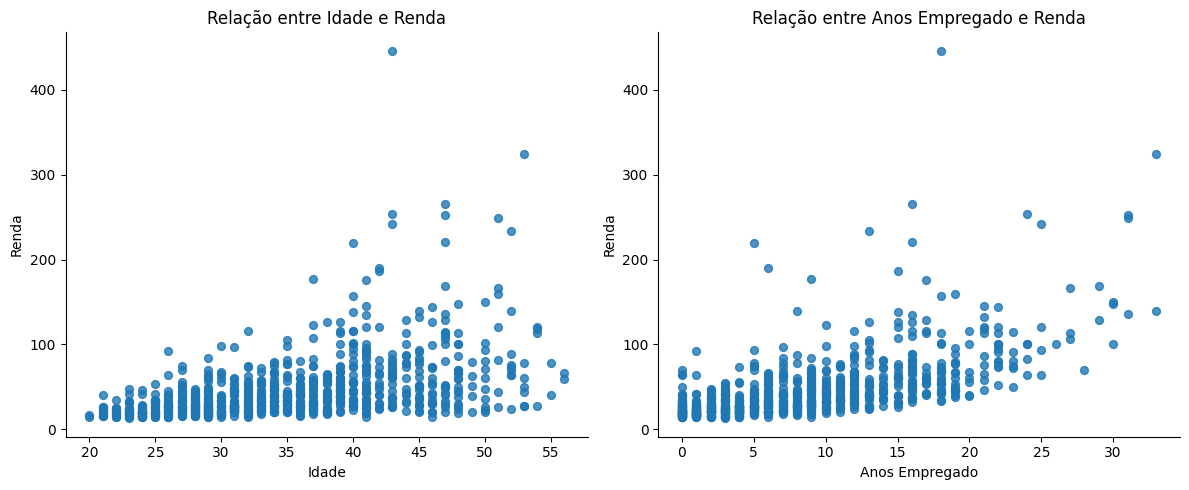

In [3]:
# Define o layout dos subplots com 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plota o primeiro gráfico de dispersão
axes[0].scatter(cust_df['Age'], cust_df['Income'], s=32, alpha=.8)
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Renda')
axes[0].set_title('Relação entre Idade e Renda')
axes[0].spines[['top', 'right']].set_visible(False)

# Plota o segundo gráfico de dispersão
axes[1].scatter(cust_df['Years Employed'], cust_df['Income'], s=32, alpha=.8)
axes[1].set_xlabel('Anos Empregado')
axes[1].set_ylabel('Renda')
axes[1].set_title('Relação entre Anos Empregado e Renda')
axes[1].spines[['top', 'right']].set_visible(False)

# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Exibe os gráficos
plt.show()

O conjunto de dados apresenta a variável `Address` como categórica. Contudo, o algoritmo k-means não pode ser empregado para variáveis discretas como essa. Para prosseguir com a clusterização, será removida essa *feature*, sendo utilizados os demais dados.

In [4]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


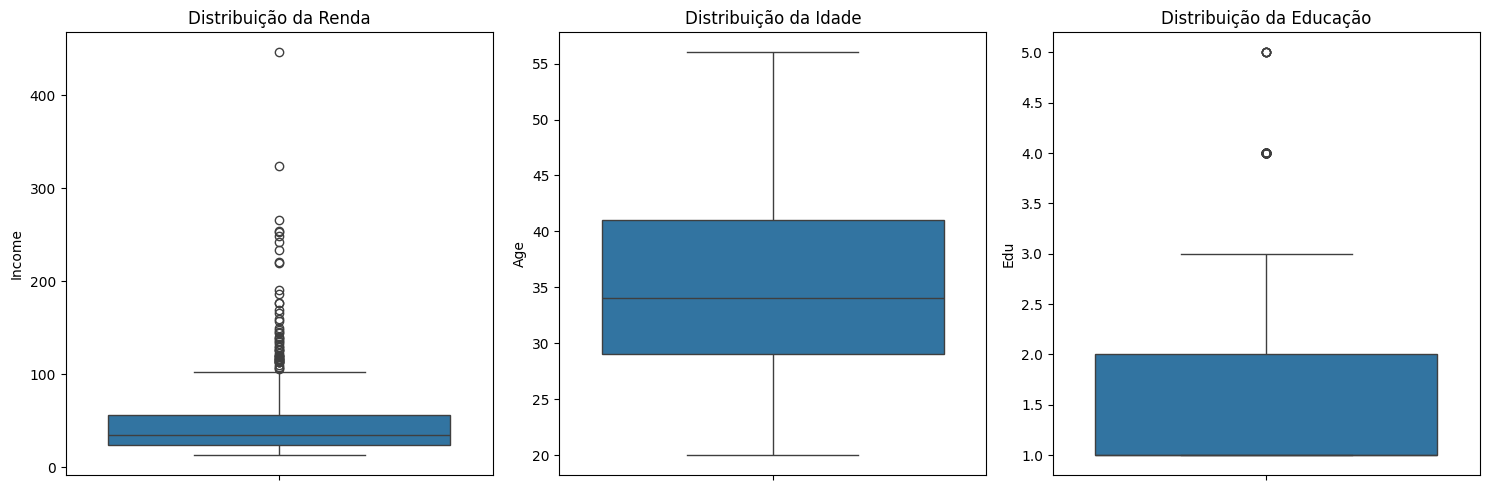

In [5]:
# Boxplots para as variáveis 'Income', 'Age' e 'Edu'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Income'])
plt.title('Distribuição da Renda')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Age'])
plt.title('Distribuição da Idade')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Edu'])
plt.title('Distribuição da Educação')

plt.tight_layout()
plt.show()

## **Normalizando o conjunto de dados**

A normalização é importante para garantir que todos os atributos tenham a mesma influência no algoritmo de clustering k-Means, evitando que atributos com magnitudes maiores dominem o processo. O `StandardScaler()` transforma os dados para que tenham média zero e desvio padrão um. Isso permite que o algoritmo interprete os atributos de forma equitativa, independentemente de suas distribuições originais.
É fundamental analisar o conjunto de dados e o problema específico para determinar se a normalização é necessária e qual método de normalização é o mais adequado.

In [6]:
from sklearn.preprocessing import StandardScaler

# Extrai os valores da matriz de dados, excluindo a primeira coluna
X = df.values[:,1:]

# Substitui os valores NaN por zero
X = np.nan_to_num(X)

# Normaliza os dados utilizando o StandardScaler
Clus_dataSet = StandardScaler().fit_transform(X)

# Exibe o conjunto de dados normalizado
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [7]:
from sklearn.cluster import KMeans

# Define o número de clusters desejado
clusterNum = 3

# Cria o objeto KMeans com os parâmetros especificados
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)

# Aplica o algoritmo KMeans aos dados
k_means.fit(X)

# Extrai os rótulos dos clusters atribuídos a cada ponto de dado
labels = k_means.labels_

# Imprime os rótulos dos clusters
print(labels)

[0 1 0 0 2 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 2 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2
 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 0 2 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

## **Adicionando rótulos ao DataFrame**

A linha `df["Clus_km"] = labels` cria uma nova coluna chamada "`Clus_km`" no DataFrame (df) e atribui a ela os rótulos dos clusters armazenados na variável `labels`. Cada linha do DataFrame terá agora um rótulo correspondente ao cluster ao qual pertence.

In [8]:
# Adiciona os rótulos dos clusters como uma nova coluna no DataFrame
df["Clus_km"] = labels

# Exibe as 5 primeiras linhas do DataFrame
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


## **Agruparmento por clusters**

---



`df.groupby('Clus_km')` agrupa as linhas do DataFrame df com base nos valores da coluna '`Clus_km`', que contém os rótulos dos clusters. Isso cria um objeto GroupBy que permite realizar operações em cada grupo de cluster separadamente.

In [9]:
# Calcula a média dos valores de cada atributo para cada cluster
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
1,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


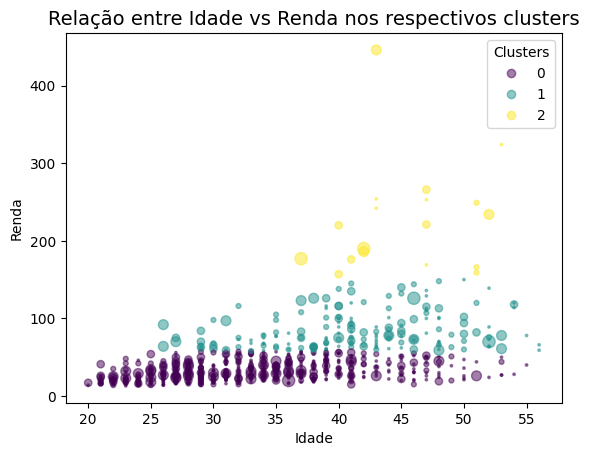

In [10]:
# Calcula a área dos pontos para o gráfico
area = np.pi * ( X[:, 1])**2

# Plota o gráfico de dispersão com a área dos pontos e cores representando os clusters
# Assign the result of plt.scatter() to the variable 'scatter'
scatter = plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.title('Relação entre Idade vs Renda nos respectivos clusters', fontsize=14)
plt.legend(*scatter.legend_elements(), loc="best", title="Clusters")
plt.xlabel('Idade', fontsize=10)
plt.ylabel('Renda', fontsize=10)

plt.show()

## **Incluindo da variável educação/escolaridade**

---



O algoritmo k-means segmentou os clientes em grupos mutuamente exclusivos, com base em suas características.  

A seguir foram definindos 3 clusters, em que foi possível obter grupos distintos, tais como:

* **Mais velho, Educado e Alta Renda**: clientes com maior renda, alto nível de educação e idade mais avançada.
* **Meia-Idade e Média Renda**: clientes na faixa etária intermediária e renda moderada.
* **Jovem e de Baixa Renda**: clientes mais jovens, com menor poder aquisitivo.

Essa clusterização permite traçar perfis demográficos detalhados de cada grupo,  revelando padrões e similaridades entre os clientes. Com essa informação, estratégias de marketing e comunicação podem ser personalizadas para cada segmento, otimizando o retorno do investimento.

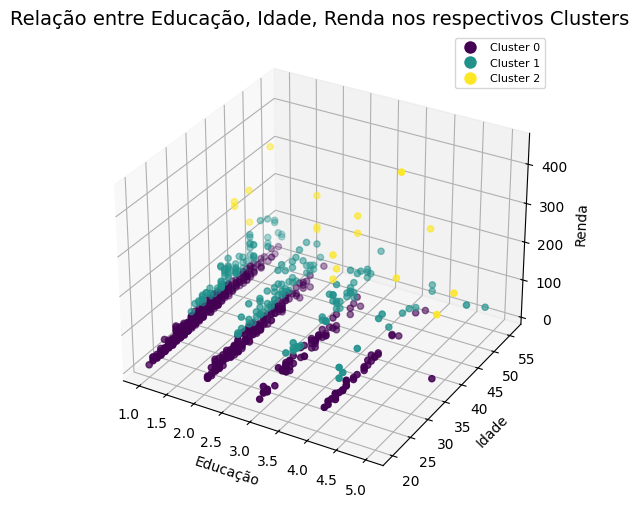

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# Cria a figura e o eixo 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plota o gráfico de dispersão 3D com cores representando os clusters
scatter = ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(float))

# Define os rótulos dos eixos
ax.set_xlabel('Educação', fontsize=10)
ax.set_ylabel('Idade', fontsize=10)
ax.set_zlabel('Renda', fontsize=10)

# Adiciona um título ao gráfico
ax.set_title('Relação entre Educação, Idade, Renda nos respectivos Clusters', fontsize=14)

# Create the legend using plt.legend() or ax.legend()
# Get unique labels and create proxy artists for the legend
unique_labels = np.unique(labels)
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {label}',
                        markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10)
           for label in unique_labels]

# Add the legend using plt.legend()
plt.legend(handles=handles, loc="best", fontsize=8)

# Exibe o gráfico
plt.show()

## **Visualização 3D aprimorada**

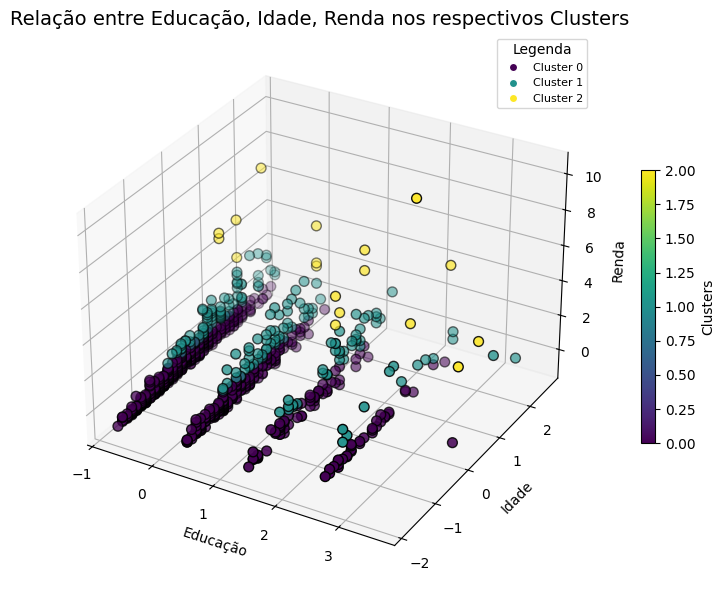

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Gráfico 3D com cores para clusters
scatter = ax.scatter(
    Clus_dataSet[:, 1], Clus_dataSet[:, 0], Clus_dataSet[:, 3],
    c=labels.astype(float), cmap='viridis', s=50, edgecolor='k'
)

# Rótulos dos eixos
ax.set_xlabel('Educação', fontsize=10)
ax.set_ylabel('Idade', fontsize=10)
ax.set_zlabel('Renda', fontsize=10)

# Título e barra de cores
ax.set_title('Relação entre Educação, Idade, Renda nos respectivos Clusters', fontsize=14)
cb = fig.colorbar(scatter, ax=ax, shrink=0.5)
cb.set_label('Clusters', fontsize=10)

# Adicionando legenda
unique_labels = np.unique(labels)
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {label}',
               markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=6)
    for label in unique_labels
]
ax.legend(handles=handles, loc="best", fontsize=8, title="Legenda")

plt.tight_layout()
plt.show()


## **Avaliando o modelo**

---


### **1. Método do "Cotovelo" para determinar o melhor k**:

Tem por objetivo encontrar o número ideal de clusters (k) analisando a soma dos quadrados das distâncias intra-cluster (SSE).

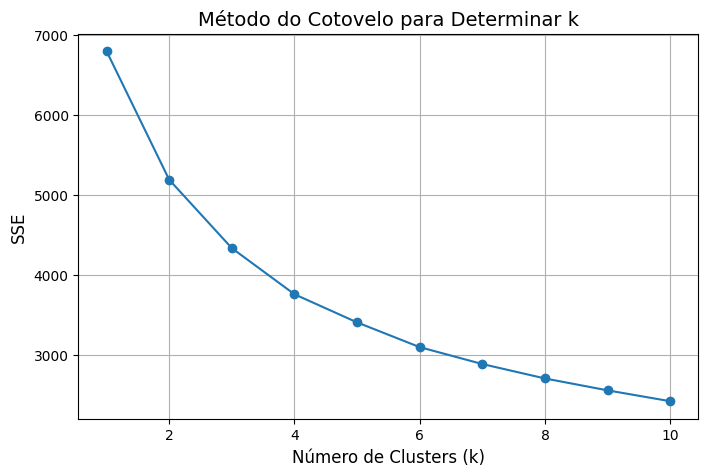

In [13]:
from sklearn.cluster import KMeans
# Cálculo do SSE para diferentes valores de k
sse = []
range_k = range(1, 11)
for k in range_k:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=12, random_state=0)
    kmeans.fit(Clus_dataSet)
    sse.append(kmeans.inertia_)

# Plot do Método do Cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range_k, sse, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('SSE', fontsize=12)
plt.title('Método do Cotovelo para Determinar k', fontsize=14)
plt.grid(True)
plt.show()

O gráfico correlaciona a SSE em função do número de clusters (k), onde se localiza o ponto de "cotovelo". Isto é, o ponto em que a taxa de redução da SSE diminui significativamente.

No gráfico acima, o cotovelo parece estar em k=3 ou k=4. A partir de 4 clusters, o ganho em termos de redução da SSE se torna menos expressivo.

### **2. Análise do Coeficiente de Silhouette**

Tem por objetivo avaliar a qualidade dos clusters, medindo quão similar um ponto de dado é ao seu próprio cluster em comparação com outros clusters.

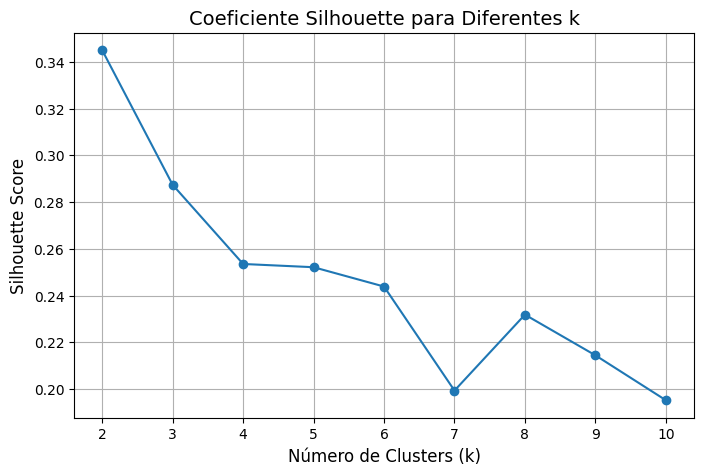

In [14]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # Silhouette não pode ser calculado para k=1
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=12, random_state=0)
    kmeans.fit(Clus_dataSet)
    score = silhouette_score(Clus_dataSet, kmeans.labels_)
    silhouette_scores.append(score)

# Plot do Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Coeficiente Silhouette para Diferentes k', fontsize=14)
plt.grid(True)
plt.show()


O coeficiente de silhouette varia de -1 a 1. Valores próximos a 1 indicam que o ponto está bem agrupado e distante de outros clusters. Enquanto, valores próximos a 0 indicam que o ponto está próximo da fronteira entre clusters. Já valores negativos indicam que o ponto pode ter sido atribuído ao cluster errado.
No gráfico acima, o coeficiente de silhouette é maior para k=2, sugerindo que 2 clusters podem ser uma boa escolha. No entanto, o valor para k=3 também é relativamente alto.

### **Conclusão**
Assim `k=3` parece ser a melhor escolha para o número de clusters. O método do cotovelo sugere que o ganho em termos de SSE diminui significativamente após 3 clusters. Além disso, o coeficiente de silhouette para `k=3` é relativamente alto, indicando uma boa qualidade dos clusters.

## **Referências**

  GÉRON, Aurélien. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.", 2022.